<a href="https://colab.research.google.com/github/sahilkachare2127/Login-and-Signup-Page-Front-end-Only-/blob/main/Breast_cancer_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# performing linear algebra
import numpy as np

# data processing
import pandas as pd

# visualisation
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/archive (1).zip")

print (data.head)


NameError: name 'data' is not defined

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       0 non-null      int64  
 1   diagnosis                0 non-null      object 
 2   radius_mean              0 non-null      float64
 3   texture_mean             0 non-null      float64
 4   perimeter_mean           0 non-null      float64
 5   area_mean                0 non-null      float64
 6   smoothness_mean          0 non-null      float64
 7   compactness_mean         0 non-null      float64
 8   concavity_mean           0 non-null      float64
 9   concave points_mean      0 non-null      float64
 10  symmetry_mean            0 non-null      float64
 11  fractal_dimension_mean   0 non-null      float64
 12  radius_se                0 non-null      float64
 13  texture_se               0 non-null      float64
 14  perimeter_se             0 non-null   

In [ ]:
print(df.head())

In [ ]:
df.drop(['Unnamed: 32', 'id'], axis = 1)
print(df.shape)


In [45]:
def diagnosis_value(diagnosis):
	if diagnosis == 'M':
		return 1
	else:
		return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)


In [ ]:
!pip install seaborn
import seaborn as sns

In [ ]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)


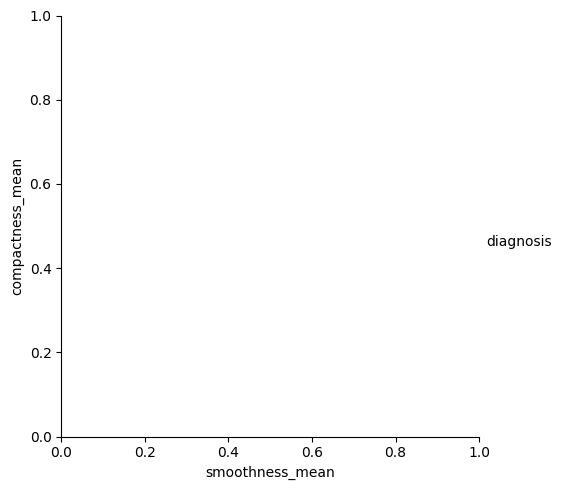

In [50]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',
		data = df, hue = 'diagnosis')


In [ ]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size = 0.33, random_state = 42)


In [49]:
from sklearn.impute import SimpleImputer

In [35]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imputer.fit(X_train)

In [37]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [40]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
	neighbors.append(k)
	knn = KNeighborsClassifier(n_neighbors = k)
	scores = cross_val_score(
		knn, X_train, y_train, cv = 10, scoring = 'accuracy')
	cv_scores.append(scores.mean())


The optimal number of neighbors is  13 


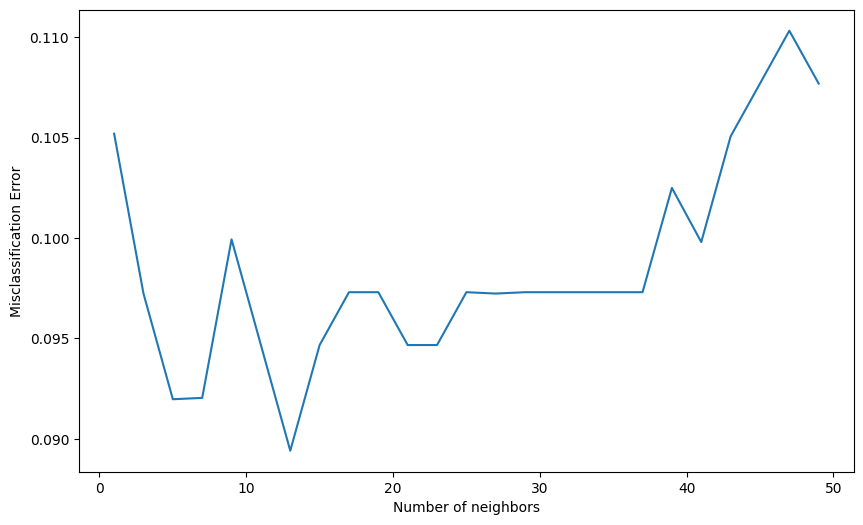

In [48]:
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()
